# How are in-demand skills trending for Data Analysts?

## Methology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand



## Import Libraries and Data


In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Group the Skills by Month
Select only those job postings that are for Data Analysts and the job country is the United States. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.


In [4]:
## Skill count per month for data analysts
df_DA_UK = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_DA_UK['job_posted_month_no'] = df_DA_UK['job_posted_date'].dt.month

# Explode job_skills column
df_DA_UK_explode = df_DA_UK.explode('job_skills')

## Pivot in Prep for Plotting
Create a pivot table from the **df_DA_UK_explode**, setting 'month' as the index, **job_skills** as the columns, and fills missing entries with zero.

In [5]:
# Group by month and job_skills
df_DA_UK_pivot = df_DA_UK_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_UK_pivot

job_skills,airflow,airtable,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,...,unreal,vba,visio,visual basic,vmware,watson,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1,0,8,0,0,1,0,10,26,1,...,0,16,9,3,0,0,2,0,28,0
2,0,0,7,0,0,0,0,8,28,2,...,0,7,2,0,2,0,4,0,16,0
3,0,0,2,0,0,0,0,7,13,0,...,0,10,0,1,0,0,2,0,10,1
4,1,0,2,0,0,0,0,7,9,0,...,0,5,0,1,0,0,3,0,10,0
5,2,0,3,0,0,1,0,8,16,0,...,0,7,3,0,0,0,0,0,8,0
6,1,0,1,0,1,0,1,15,19,0,...,0,9,2,0,0,0,1,0,12,0
7,2,0,1,0,0,0,0,13,31,0,...,0,9,0,1,2,0,3,0,16,0
8,0,0,0,0,0,0,0,9,17,0,...,0,7,0,1,1,0,4,1,11,0
9,2,0,4,1,0,0,1,17,24,0,...,0,25,0,5,1,1,1,0,13,1


## Sort columns by count and change month numbers to names

It adds a new row labeled Total that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [6]:
# sorts by count
df_DA_UK_pivot.loc['Total'] = df_DA_UK_pivot.sum()
df_DA_UK_pivot = df_DA_UK_pivot[df_DA_UK_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_UK_pivot = df_DA_UK_pivot.drop('Total')

df_DA_UK_pivot

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,255,226,157,95,91,50,74,26,15,32,...,0,0,0,1,0,0,0,0,0,0
2,182,162,92,61,57,37,38,28,14,16,...,0,0,0,0,0,0,0,0,0,0
3,119,105,71,47,50,31,14,13,18,11,...,0,0,0,0,0,0,0,0,0,0
4,84,78,46,40,28,17,24,9,11,7,...,0,0,0,0,0,0,0,0,0,0
5,114,84,59,30,29,18,8,16,12,9,...,0,0,0,0,0,0,0,0,0,0
6,102,95,79,36,37,17,8,19,12,17,...,0,0,0,0,0,0,0,0,0,0
7,131,113,97,52,42,29,34,31,14,18,...,0,0,0,0,0,1,0,0,0,0
8,109,78,64,39,39,16,10,17,13,7,...,0,0,0,0,0,0,0,0,0,0
9,211,167,130,99,87,58,24,24,15,11,...,0,0,1,0,0,0,1,0,0,0


## Plot the Monthly Skill Counts

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

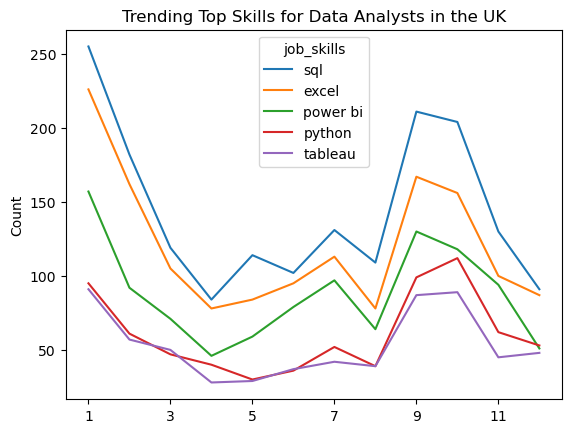

In [8]:
df_DA_UK_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the UK')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

This is good but totals can be misleading without context. Percentages clarify relationships within the whole, giving a more accurate comparison.

## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in df_DA by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in DA_totals. This is needed to compute the percentages.

In [9]:
# Get monthly totals
DA_totals = df_DA_UK.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     519
2     355
3     237
4     175
5     202
6     215
7     253
8     212
9     369
10    369
11    266
12    205
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the **df_DA_pivot** DataFrame, which contains skill counts, by the monthly totals in DA_totals and multiplying by 100. The new DataFrame, **df_DA_pivot_percent**, shows skill distributions as percentages of total monthly job entries.

In [10]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_UK_percent = df_DA_UK_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_UK_percent = df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_UK_percent = df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_no')

df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,49.132948,43.545279,30.250482,18.304432,17.533719,9.633911,14.258189,5.009634,2.890173,6.165703,...,0.000000,0.000000,0.000000,0.192678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.267606,45.633803,25.915493,17.183099,16.056338,10.422535,10.704225,7.887324,3.943662,4.507042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,50.210970,44.303797,29.957806,19.831224,21.097046,13.080169,5.907173,5.485232,7.594937,4.641350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,48.000000,44.571429,26.285714,22.857143,16.000000,9.714286,13.714286,5.142857,6.285714,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,56.435644,41.584158,29.207921,14.851485,14.356436,8.910891,3.960396,7.920792,5.940594,4.455446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,47.441860,44.186047,36.744186,16.744186,17.209302,7.906977,3.720930,8.837209,5.581395,7.906977,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,51.778656,44.664032,38.339921,20.553360,16.600791,11.462451,13.438735,12.252964,5.533597,7.114625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.395257,0.000000,0.000000,0.000000,0.000000
Aug,51.415094,36.792453,30.188679,18.396226,18.396226,7.547170,4.716981,8.018868,6.132075,3.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,57.181572,45.257453,35.230352,26.829268,23.577236,15.718157,6.504065,6.504065,4.065041,2.981030,...,0.000000,0.000000,0.271003,0.000000,0.000000,0.000000,0.271003,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the **df_DA_pivot_percent** DataFrame. Also the legend is moved outside of the plot for readability.

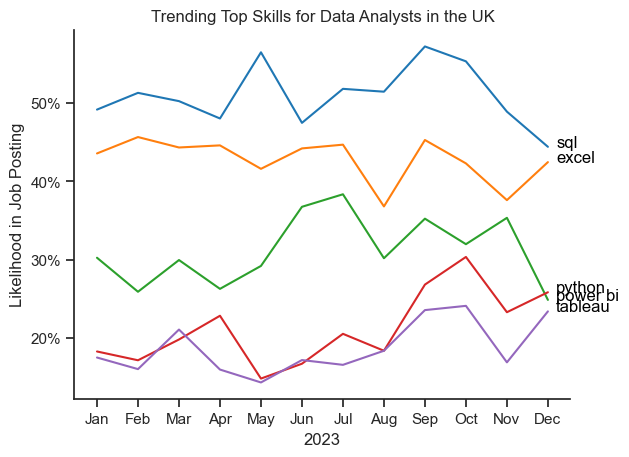

In [19]:
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the data
df_plot = df_DA_UK_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()  # Remove top and right spines

# Set title and axis labels
plt.title('Trending Top Skills for Data Analysts in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')

# Remove the legend
plt.legend().remove()

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Annotate the plot with the top 5 skills using plt.text(), avoiding overlap
y_positions = df_plot.iloc[-1, :].values  # Get the final y-values for all lines

# Sort the y-values to manage overlap more effectively
sorted_idx = y_positions.argsort()
y_positions_sorted = y_positions[sorted_idx]

# Initialize a list to store adjusted y-positions
adjusted_y_positions = []

for i, y in enumerate(y_positions_sorted):
    # Avoid collisions by adjusting the y-position if it's close to the previous one
    if i > 0 and y - adjusted_y_positions[-1] < 0.03:  # Adjust the 0.03 threshold as needed
        adjusted_y_positions.append(adjusted_y_positions[-1] + 0.04)  # Increase the gap between labels
    else:
        adjusted_y_positions.append(y)

# Apply the adjusted y-positions to the plot annotations
for i, pos in enumerate(adjusted_y_positions):
    plt.text(11.2, pos, df_plot.columns[sorted_idx[i]], color='black')

# Show the plot
plt.show()
